In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:

df = pd.read_csv("Turbofan_HPC_Efficiency.csv")
df.head(5)

,NetThrust_kN,CoreNozzleGrossThrust_kN,BypassNozzleGrossThrust_kN,Sp.FuelConsumption_g/(kN*s),SpecificThrust_m/s,CoreNozzleVel.V8_m/s,CoreNozzlePressureRatio,BypassNozzleVel.V18_m/s,BypassNozzlePressureRatio,BurnerEfficiency,EnginePressureRatioP5/P2,HPSpoolSpeed_RPM,LPSpoolSpeed_RPM,FuelFlow_kg/s,LPTExitPressureP5_kPA,LPTExitTemperatureT5_K,Isentr.HPCEfficiency
0,38.467255,11.217579,102.952769,14.349541,120.587661,445.559446,1.666404,308.277091,2.342404,0.999534,1.103993,14944.835419,3261.916032,0.551987,40.134570,722.008949,0.861717
1,44.217856,13.586609,108.449503,15.271965,134.847057,512.666723,1.838548,310.964933,2.424760,0.999713,1.218305,14944.835419,3457.002243,0.675294,44.290294,810.585622,0.789251
2,38.413089,11.196754,102.897310,14.342064,120.453052,444.968535,1.664960,308.252517,2.341573,0.999532,1.103032,14944.835419,3260.182614,0.550923,40.099662,721.251985,0.862491
3,34.905462,9.798766,99.285488,13.898886,111.670620,407.283489,1.570330,306.645196,2.287458,0.999362,1.039987,14944.835419,3143.194846,0.485147,37.807693,677.901510,0.911628
4,38.788102,11.340700,103.280789,14.394312,121.384538,449.064098,1.674947,308.422881,2.347317,0.999547,1.109677,14944.835419,3272.188503,0.558328,40.341220,726.539704,0.857156


In [4]:
# Some quick description of our data
df.describe()

,NetThrust_kN,CoreNozzleGrossThrust_kN,BypassNozzleGrossThrust_kN,Sp.FuelConsumption_g/(kN*s),SpecificThrust_m/s,CoreNozzleVel.V8_m/s,CoreNozzlePressureRatio,BypassNozzleVel.V18_m/s,BypassNozzlePressureRatio,BurnerEfficiency,EnginePressureRatioP5/P2,HPSpoolSpeed_RPM,LPSpoolSpeed_RPM,FuelFlow_kg/s,LPTExitPressureP5_kPA,LPTExitTemperatureT5_K,Isentr.HPCEfficiency
count,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,1.197100e+04,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000
mean,38.628892,11.282205,103.084040,14.390388,120.971383,447.777292,1.671937,308.353413,2.344368,0.999530,1.107641,1.494484e+04,3266.978242,0.556615,40.267222,726.066460,0.860237
std,2.274080,0.904578,2.283309,0.322028,5.655847,25.250795,0.063290,1.043508,0.034206,0.000091,0.042098,7.276262e-12,74.908588,0.045388,1.530415,31.744915,0.030808
min,33.880462,9.396328,98.189039,13.794478,109.088315,396.634698,1.543633,306.188355,2.271034,0.999302,1.022178,1.494484e+04,3109.219926,0.467363,37.160277,666.834749,0.787461
25%,36.985668,10.639180,101.432144,14.153845,116.896573,429.511069,1.626697,307.604225,2.319622,0.999470,1.077561,1.494484e+04,3213.954990,0.523489,39.173684,702.419292,0.837972
50%,38.491947,11.227067,102.978045,14.352957,120.649011,445.828846,1.667061,308.288297,2.342782,0.999535,1.104430,1.494484e+04,3262.706431,0.552473,40.150476,722.354795,0.861365
75%,40.185508,11.884030,104.686696,14.598812,124.849105,464.655773,1.713272,309.060025,2.368381,0.999597,1.135158,1.494484e+04,3317.117584,0.586661,41.267561,747.044980,0.882846
max,44.371966,13.657509,108.580079,15.302824,135.234720,514.668257,1.843981,311.042031,2.426716,0.999717,1.221906,1.494484e+04,3462.991480,0.679016,44.421186,813.242376,0.925880


<Axes: >

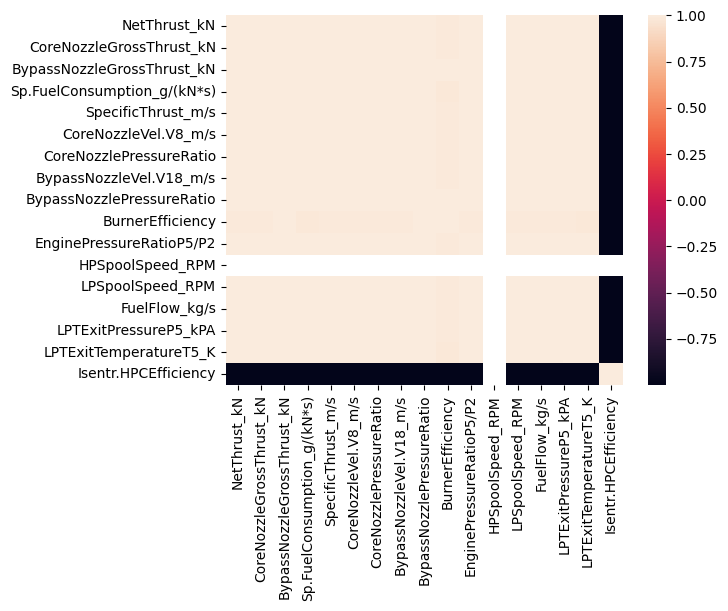

In [5]:
# Lets look how linearly correlated our features are
from seaborn import heatmap
heatmap(df.corr(), xticklabels=df.columns, yticklabels=df.columns)

In [6]:
df.columns

Index(['NetThrust_kN', 'CoreNozzleGrossThrust_kN',
       'BypassNozzleGrossThrust_kN', 'Sp.FuelConsumption_g/(kN*s)',
       'SpecificThrust_m/s', 'CoreNozzleVel.V8_m/s', 'CoreNozzlePressureRatio',
       'BypassNozzleVel.V18_m/s', 'BypassNozzlePressureRatio',
       'BurnerEfficiency', 'EnginePressureRatioP5/P2', 'HPSpoolSpeed_RPM',
       'LPSpoolSpeed_RPM', 'FuelFlow_kg/s', 'LPTExitPressureP5_kPA',
       'LPTExitTemperatureT5_K', 'Isentr.HPCEfficiency'],
      dtype='object')

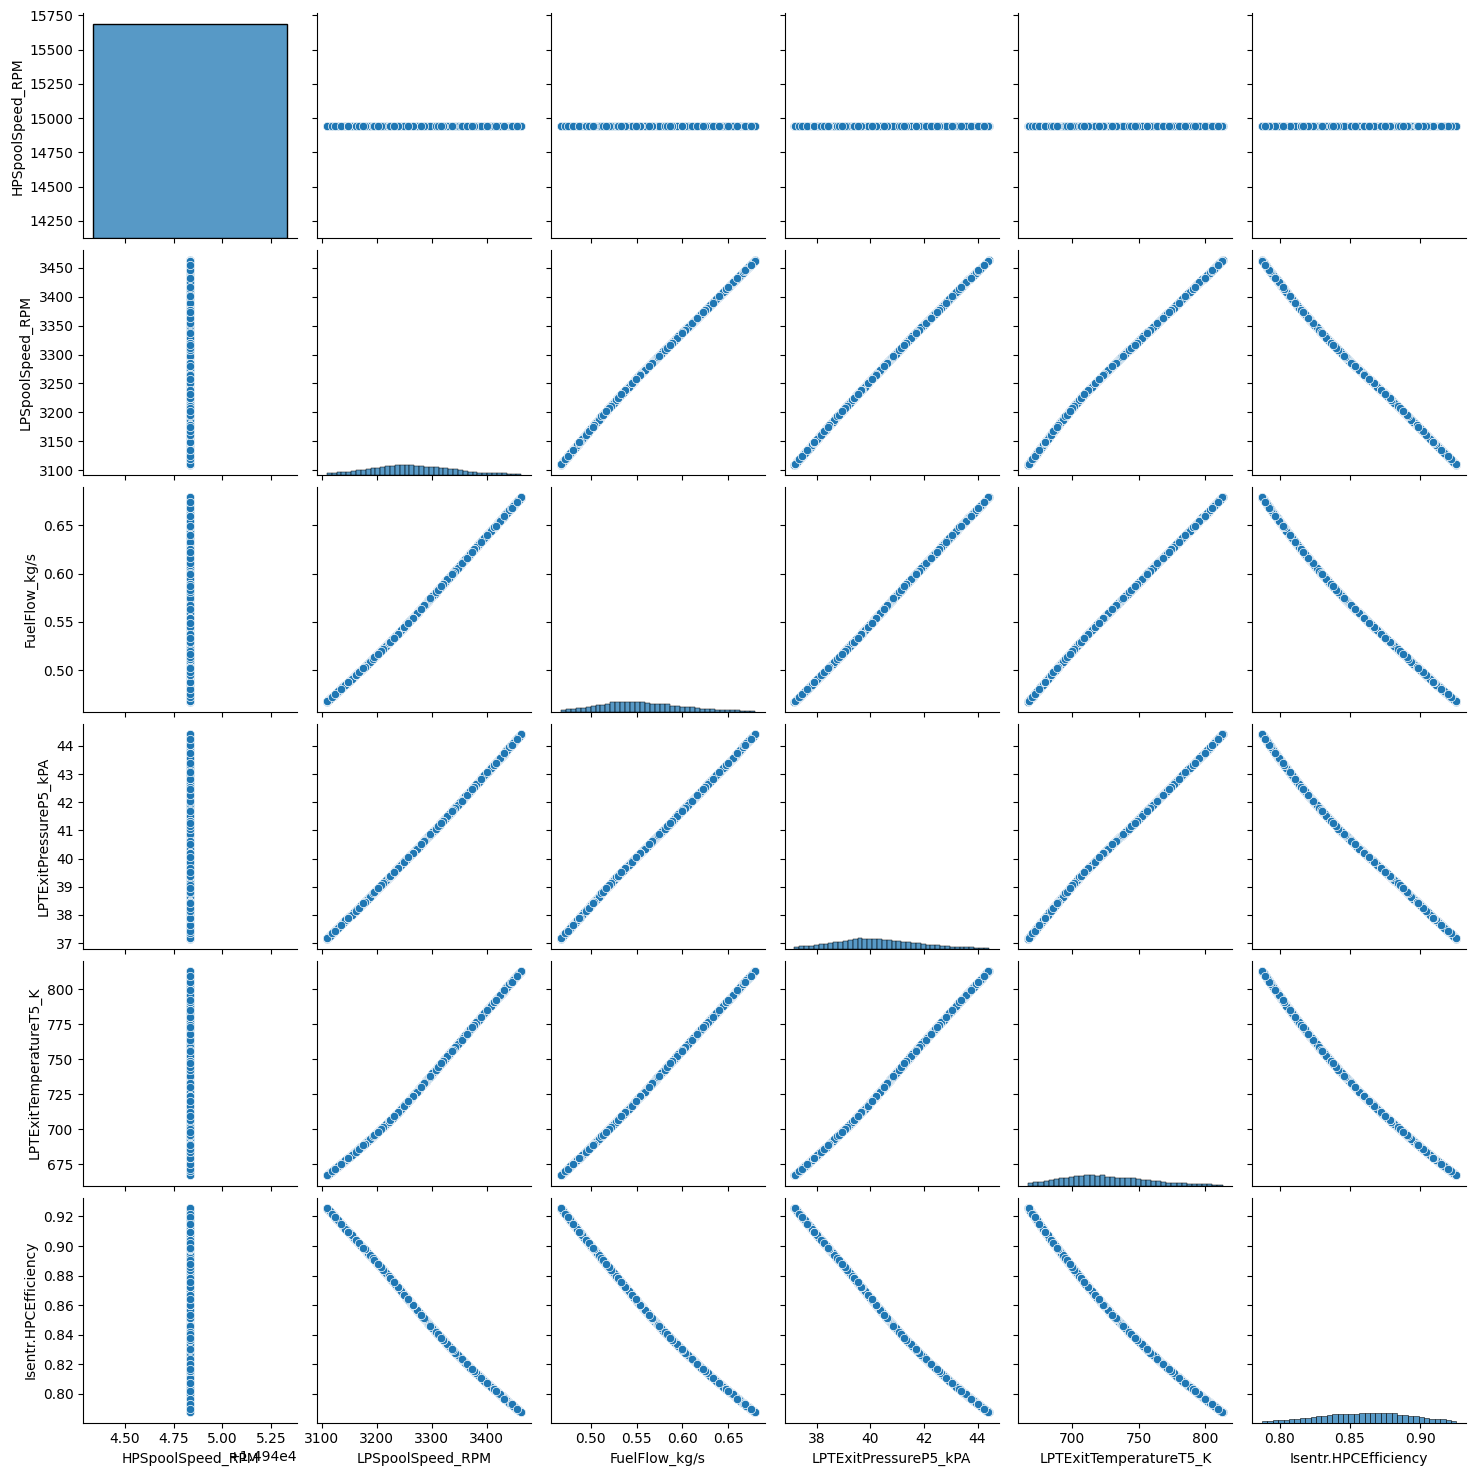

In [7]:
from seaborn import pairplot
pairplot(df, vars = ['HPSpoolSpeed_RPM', 'LPSpoolSpeed_RPM' , 'FuelFlow_kg/s', 'LPTExitPressureP5_kPA', 'LPTExitTemperatureT5_K', 'Isentr.HPCEfficiency'])